<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   make          74 non-null     object  
 1   price         74 non-null     int16   
 2   mpg           74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 3.5+ KB
count       74.000000
mean      6165.256757
std       2949.495885
min       3291.000000
25%       4220.250000
50%       5006.500000
75%       6332.250000
max      15906.000000
Name: price, dtype

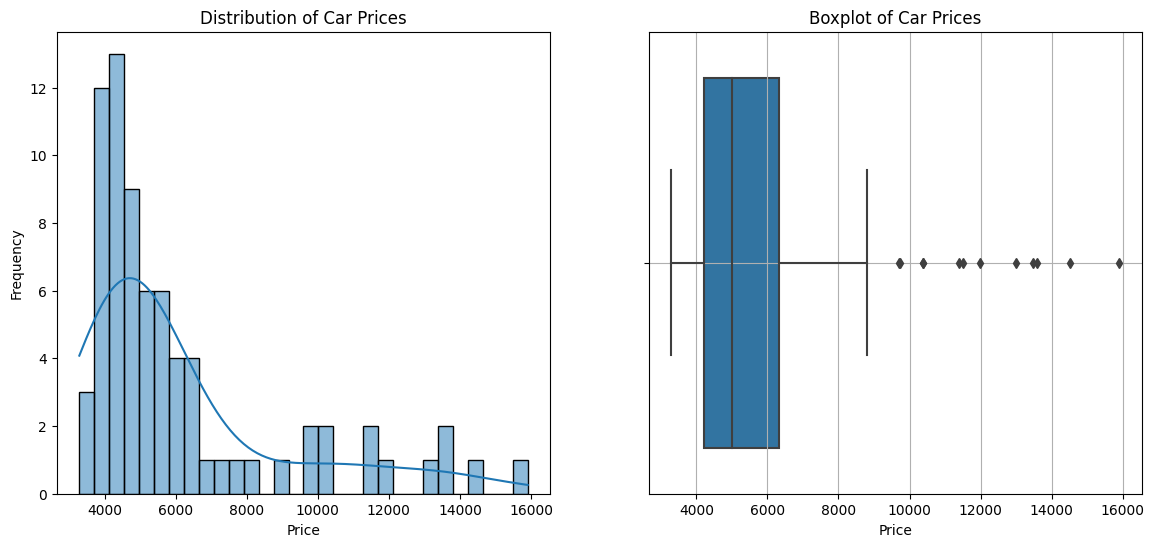

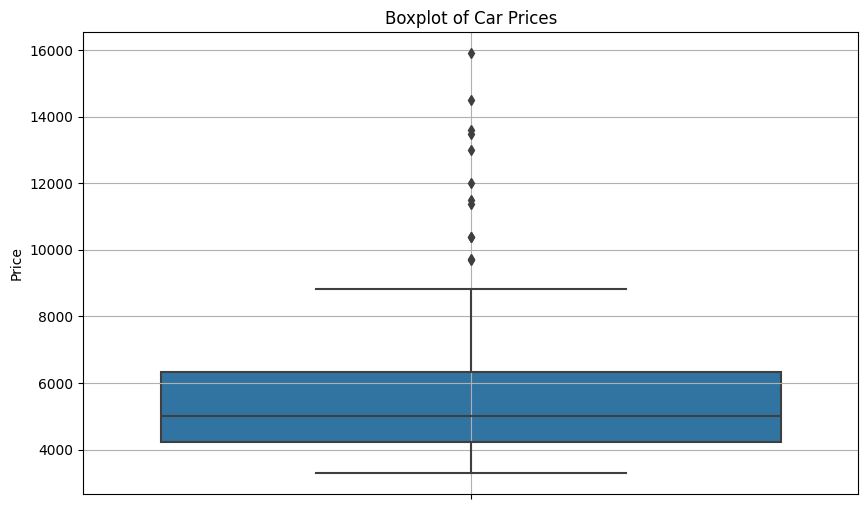

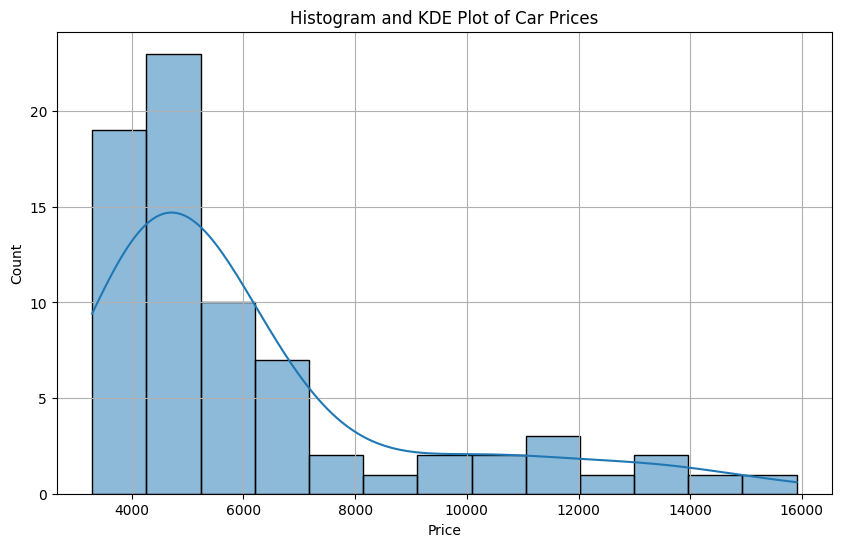

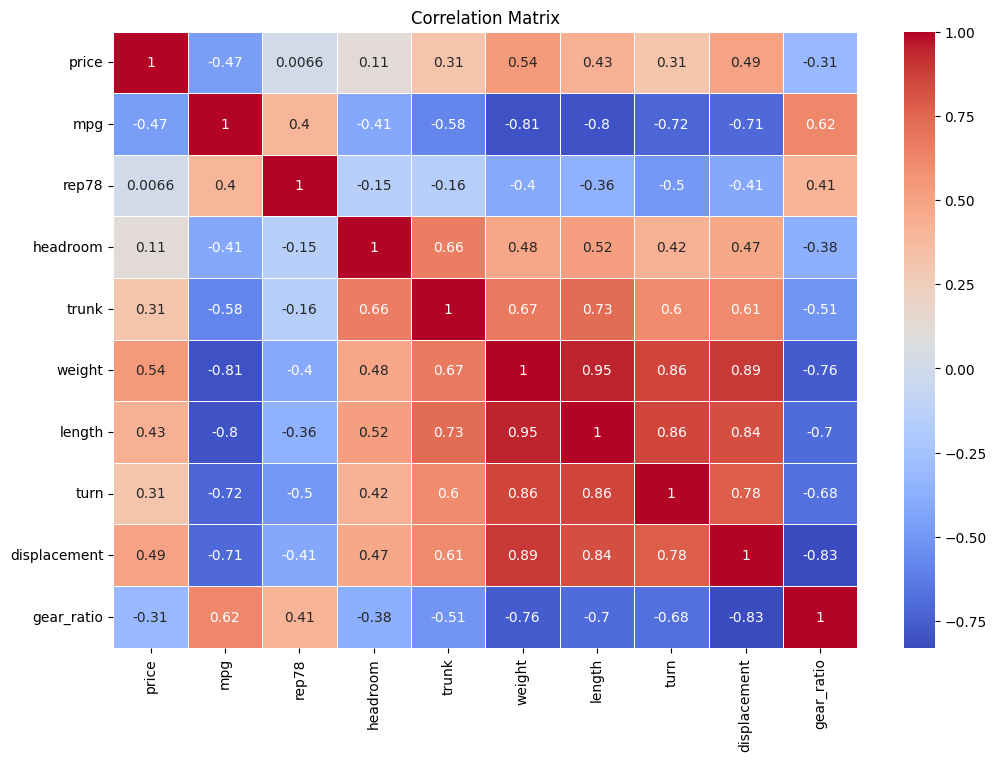

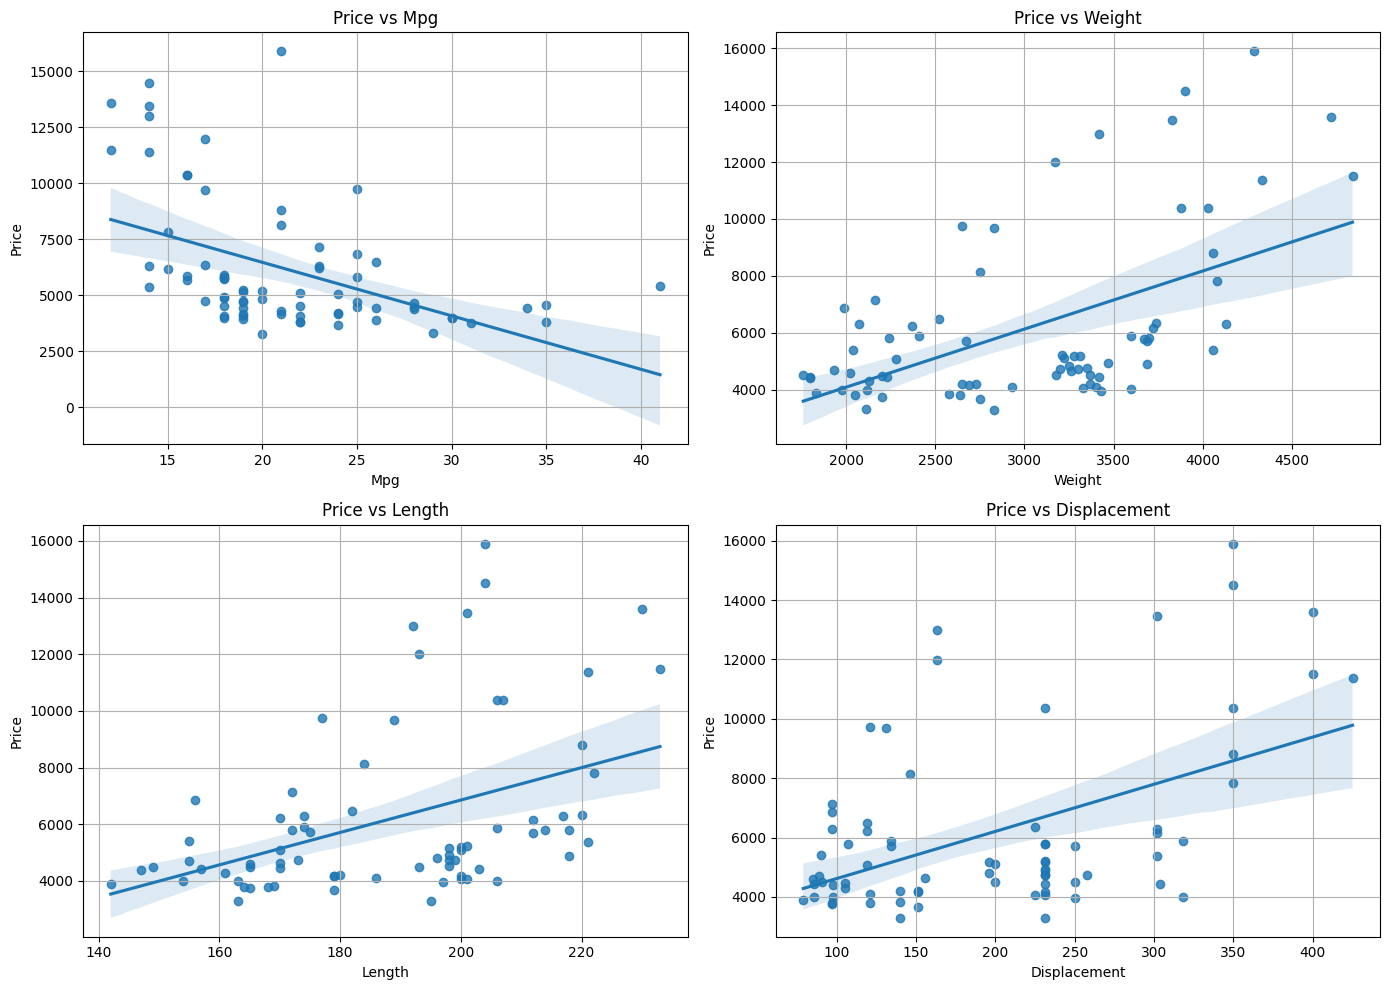

E:\ana\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


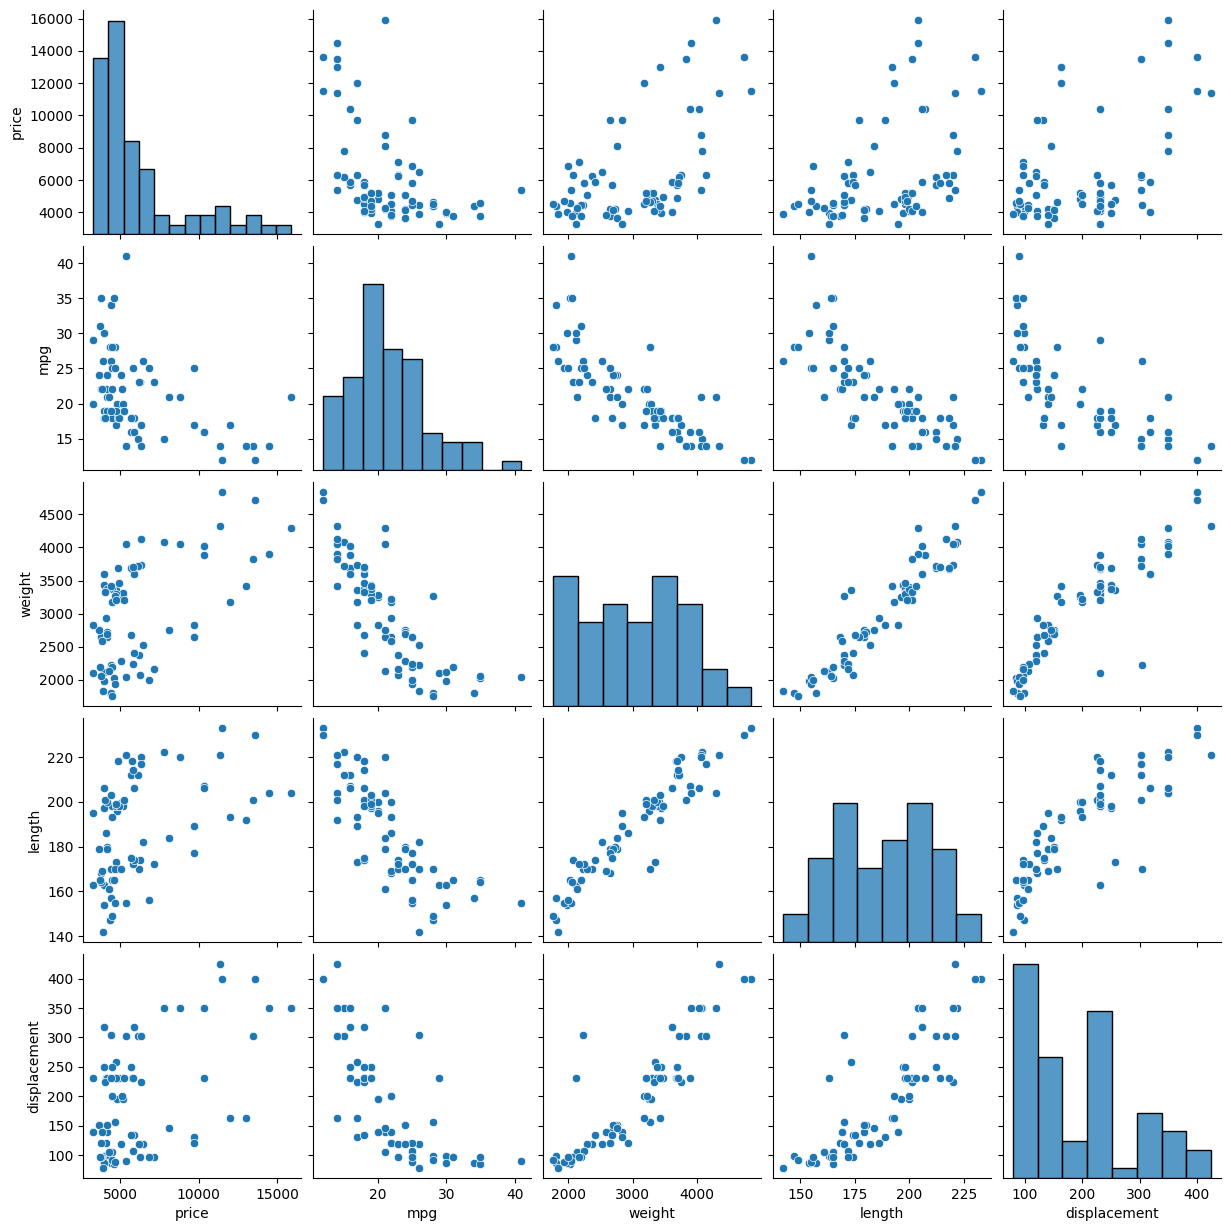

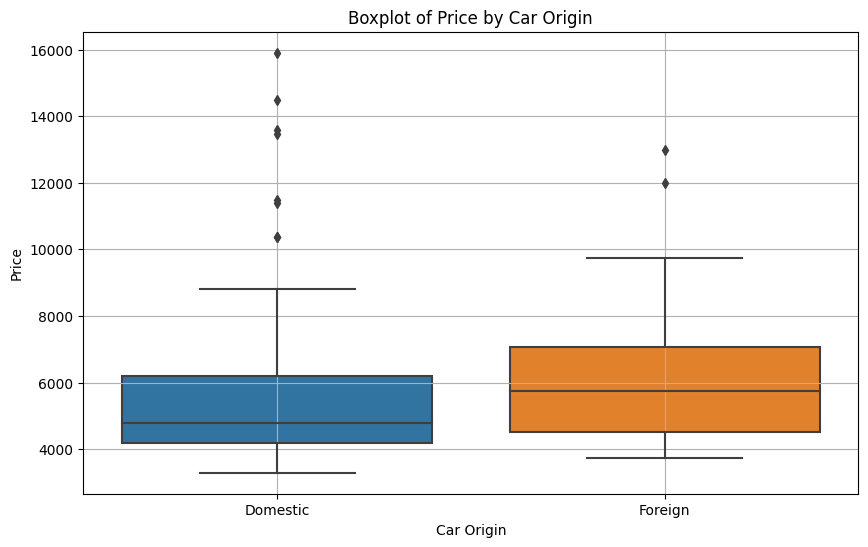

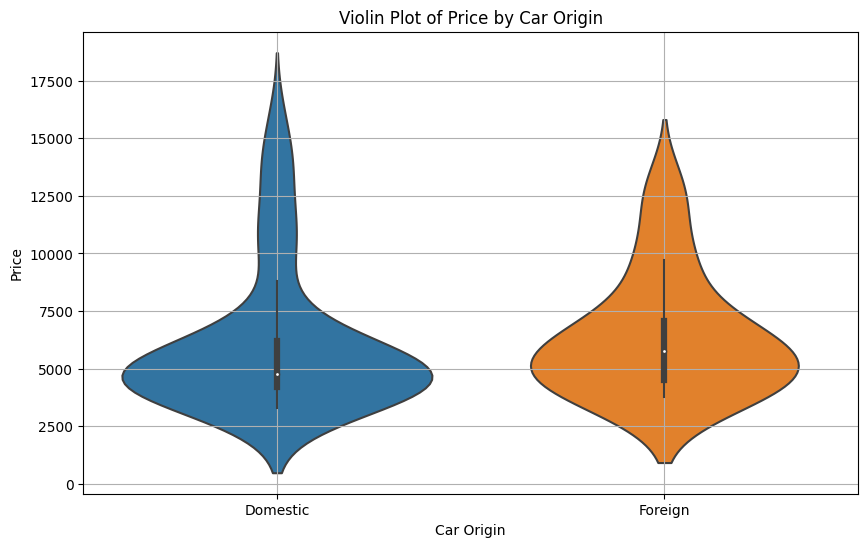

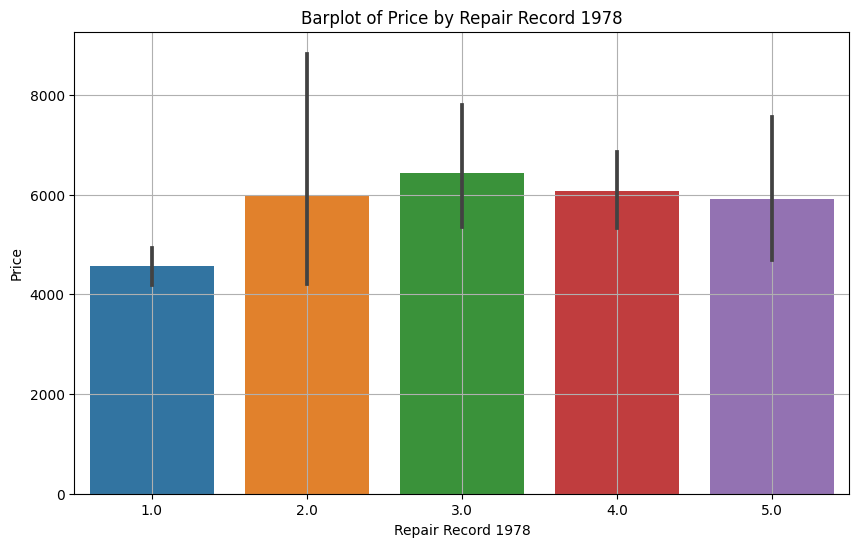

                 mean  median
                price   price
foreign                      
Domestic  6072.423077  4782.5
Foreign   6384.681818  5759.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'auto.dta'
df = pd.read_stata(file_path)

#Display the summary of the dataframe
df.info()

#Univariate analysis
price_stats = df['price'].describe()
print(price_stats)

#Price histograms and density plots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.grid(True)
plt.savefig('boxplot_price.png')
plt.show()

#Box plot of price
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.title('Boxplot of Car Prices')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('boxplot_price_vertical.png')
plt.show()

#The density chart of the price is replaced by a combination of histogram and density chart
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Histogram and KDE Plot of Car Prices')
plt.xlabel('Price')
plt.grid(True)
plt.savefig('density_plot_price.png')
plt.show()

#Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

#Price in relation to other variables (scatter plot and regression analysis)
variables = ['mpg', 'weight', 'length', 'displacement']
plt.figure(figsize=(14, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=df[var], y=df['price'])
    plt.title(f'Price vs {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Price')
    plt.grid(True)
plt.tight_layout()
plt.savefig('price_vs_variables.png')
plt.show()

#Pairwise diagram
sns.pairplot(df[['price', 'mpg', 'weight', 'length', 'displacement']])
plt.savefig('pairplot.png')
plt.show()

#Categorical variable analysis (foreign and price)
plt.figure(figsize=(10, 6))
sns.boxplot(x='foreign', y='price', data=df)
plt.title('Boxplot of Price by Car Origin')
plt.xlabel('Car Origin')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('boxplot_price_by_origin.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='foreign', y='price', data=df)
plt.title('Violin Plot of Price by Car Origin')
plt.xlabel('Car Origin')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('violin_plot_price_by_origin.png')
plt.show()

#Category variable analysis (rep78 and price)
plt.figure(figsize=(10, 6))
sns.barplot(x='rep78', y='price', data=df)
plt.title('Barplot of Price by Repair Record 1978')
plt.xlabel('Repair Record 1978')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('barplot_price_by_rep78.png')
plt.show()

#PivotTable
pivot_table = df.pivot_table(values='price', index='foreign', aggfunc=['mean', 'median'])
print(pivot_table)
